In [1]:
import pandas as pd

from sklearn import metrics
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, \
    cross_val_predict

In [2]:
stories = pd.read_csv('../data/lobsters_numeric.csv')

In [3]:
stories.head()

,Unnamed: 0,comment_count,downvotes,score,upvotes,karma,android,announce,api,art,...,video,vim,virtualization,visualization,web,windows,created_hour,created_dow,created_year,scaled_title_popularity
0,000yx1,2,0,22,22,4957.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,14,4,2017,0.053848
1,001m4w,1,0,3,3,6384.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13,0,2014,0.249789
2,002cgs,2,0,12,12,194.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,18,1,2017,0.102904
3,006hat,0,0,7,7,23.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,15,4,2012,0.030448
4,00adts,1,0,7,7,1028.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10,2,2016,0.049901


In [4]:
stories = stories.set_index('Unnamed: 0')

### Setting up test and train data

In [ ]:
train_test_split?

In [5]:
y = stories.score
X = stories.drop(['score'], axis=1).as_matrix()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

### Training our Model

In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0.5,1,'Scores vs Predicted scores: $Y_i$ vs $\\hat{Y}_i$')

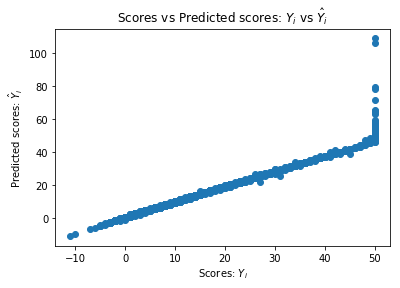

In [8]:
y_pred = lr.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Scores: $Y_i$")
plt.ylabel("Predicted scores: $\hat{Y}_i$")
plt.title("Scores vs Predicted scores: $Y_i$ vs $\hat{Y}_i$")

In [9]:
metrics.mean_squared_error(y_test, y_pred)

1.51470457011175

In [10]:
metrics.explained_variance_score(y_test, y_pred)

0.9788882086998653

### Looking at our model with cross validation

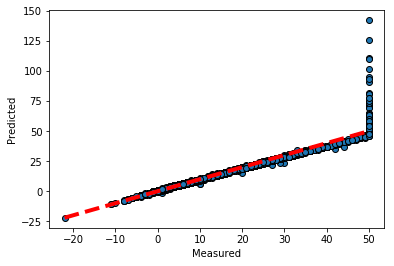

In [11]:
lr_cv = LinearRegression()
predicted = cross_val_predict(lr_cv, X_train, y_train, cv=10)
fig, ax = plt.subplots()
ax.scatter(y_train, predicted, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], 
        [y_train.min(), y_train.max()], 'r--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Something is definitely fishy... 

Here's a look from the sklearn documentation of how linear regression charts "normally" look.

![](http://scikit-learn.org/stable/_images/sphx_glr_plot_cv_predict_001.png)

### Investigating what features might be overfitting

In [12]:
lr.coef_

array([ 2.10827766e-02, -1.01359865e+00,  9.08018883e-01,  4.10576883e-06,
       -1.42939213e-01, -3.18572710e+00, -9.13225192e-02, -4.00188914e-03,
        2.76323261e-01,  1.09732601e-01, -1.99504086e-01,  7.28070466e-02,
       -7.57683005e-02,  4.49755591e-02, -1.83068416e-01,  1.76018852e-01,
       -4.79380451e-02,  1.04705510e-01, -2.36686151e-01, -3.40259330e-01,
       -1.82288477e-01, -1.43004315e-01,  1.47281453e-01,  1.03998763e-03,
       -1.38177403e-01,  5.81262827e-02, -2.36875977e-01, -9.97652593e-02,
        9.35842484e-02,  7.02202424e-02,  3.41025085e-01,  1.27460409e-01,
       -3.23181799e-01, -1.81345242e-02, -2.89516086e-02, -3.72959197e-02,
        8.15229543e-02,  3.02467663e-02,  1.98751830e-03,  1.05323216e-01,
        5.66602708e-02,  1.49835435e+00, -1.87345372e-01,  5.82956112e-02,
       -1.12841129e-01, -2.39520573e-01, -2.49974226e-01,  6.36400606e-02,
        5.40607074e-02,  1.35004642e-01, -6.59882468e-02,  1.05089600e-01,
       -1.94079525e-02, -

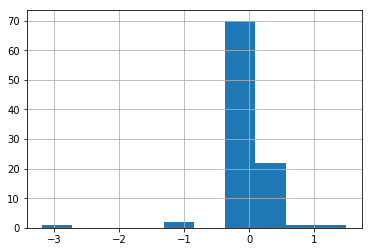

In [13]:
pd.Series(lr.coef_).hist()

In [14]:
x_cols = stories.drop('score', axis=1).columns

In [ ]:
a = list('123')
b = list('abc')
print(a)
print(b)
list(zip(a, b))

In [15]:
for col, coef in zip(x_cols, lr.coef_):
    if coef > .5 or coef < -0.5:
        print(col, coef)

downvotes -1.0135986502696344
upvotes 0.9080188827881093
announce -3.1857270959588155
interview 1.4983543452961887
meta -0.861554474695577


### Your Turn

- Is this a good set of features? Do we possibly have leakage? Why or why not?

### Save our model

In [16]:
from sklearn.externals import joblib
joblib.dump(lr, '../data/lobsters_lr_score_model_overfit.pkl') 

['../data/lobsters_lr_score_model_overfit.pkl']